# K-Means Clustering

**Overview**<br>
<a href="https://archive.ics.uci.edu/ml/datasets/online+retail">Online retail is a transnational data set</a> which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.


# Read and Understand the Data

In [1]:
# importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
# supress warnings

import warnings
warnings.filterwarnings("ignore")

In [4]:
#read the Dataset
retail=pd.read_csv("Online_Retail.csv",encoding='unicode_escape')
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [5]:
retail.shape

(541909, 8)

In [6]:
# basics of the dataset
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


# Clean the Data

In [7]:
# checking for missing values in DataFrame

retail.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
# checking missing values percentage

round((retail.isnull().sum()/len(retail))*100,2)

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

As there is 25% missing values in the CustomerId but we can't drop this column otherwise we cant do customer segmentataion
so better option is to drop the rows where rows are missing instead of dropping the column

In [9]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [10]:
# drop all rows having missing values

retail=retail[~(retail["CustomerID"].isnull())]
retail=retail[~(retail["Description"].isnull())]

#             or

#     retail= retail.dropna()
         

In [11]:
retail.shape

(406829, 8)

In [12]:
retail.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [13]:
# correcting Datatype of CustomerID from float to int

retail["CustomerID"]=retail["CustomerID"].astype("int")

In [14]:
# Creating new column "amount"                   
retail["amount"]=retail["Quantity"]*retail["UnitPrice"]

#                        or

# retail["amount"]=retail.apply(lambda x:x["Quantity"]*x["UnitPrice"],axis=1)

In [15]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850,United Kingdom,20.34


# 3. Prepare the Data for Modelling

In customer Segmentation,standard baseline for using the variables from the dataset for modelling is : 

- R (Recency): Number of days since last purchase
- F (Frequency): Number of tracsactions
- M (Monetary): Total amount of transactions (revenue contributed)

###### monetary

In [16]:
# monetary

retail.groupby("CustomerID")["amount"].sum()


CustomerID
12346       0.00
12347    4310.00
12348    1797.24
12349    1757.55
12350     334.40
          ...   
18280     180.60
18281      80.82
18282     176.60
18283    2094.88
18287    1837.28
Name: amount, Length: 4372, dtype: float64

In [17]:
amount=retail.groupby("CustomerID")["amount"].sum().reset_index()
amount.head()

,CustomerID,amount
0,12346,0.00
1,12347,4310.00
2,12348,1797.24
3,12349,1757.55
4,12350,334.40


##### frequency

In [18]:
# frequency

frequency=retail.groupby("CustomerID")["InvoiceNo"].count().reset_index()
frequency.head()

,CustomerID,InvoiceNo
0,12346,2
1,12347,182
2,12348,31
3,12349,73
4,12350,17


In [19]:
frequency=frequency.rename(columns={"InvoiceNo": "frequency"})

#    or

#    frequency.columns=['CustomerID', 'frequency']

In [20]:
retail.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850,United Kingdom,20.34


In [21]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  int32  
 7   Country      406829 non-null  object 
 8   amount       406829 non-null  float64
dtypes: float64(2), int32(1), int64(1), object(5)
memory usage: 29.5+ MB


##### recency

In [22]:
# Changing the datatype to datetime format

retail['InvoiceDate']=pd.to_datetime(retail['InvoiceDate'],format="%d-%m-%Y %H:%M")                   

In [23]:
# getting max Date

max_date=max(retail['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [24]:
# calculating the diff

retail["diff"]=max_date-retail["InvoiceDate"]

In [25]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount,diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,373 days 04:24:00


In [26]:
recency=retail.groupby("CustomerID")["diff"].min().reset_index()
recency.head()

,CustomerID,diff
0,12346,325 days 02:33:00
1,12347,1 days 20:58:00
2,12348,74 days 23:37:00
3,12349,18 days 02:59:00
4,12350,309 days 20:49:00


In [27]:
recency=recency.rename(columns={"diff":"recency"})

In [28]:
# number of days only
recency["recency"]=recency["recency"].dt.days

In [29]:
recency.head()

,CustomerID,recency
0,12346,325
1,12347,1
2,12348,74
3,12349,18
4,12350,309


In [30]:
# Lets concat all the three metrics

grouped_df=pd.concat([amount,frequency.drop(columns=["CustomerID"]),recency.drop(columns=["CustomerID"])],axis=1)
grouped_df.head()

,CustomerID,amount,frequency,recency
0,12346,0.00,2,325
1,12347,4310.00,182,1
2,12348,1797.24,31,74
3,12349,1757.55,73,18
4,12350,334.40,17,309


### Outlier Treatment

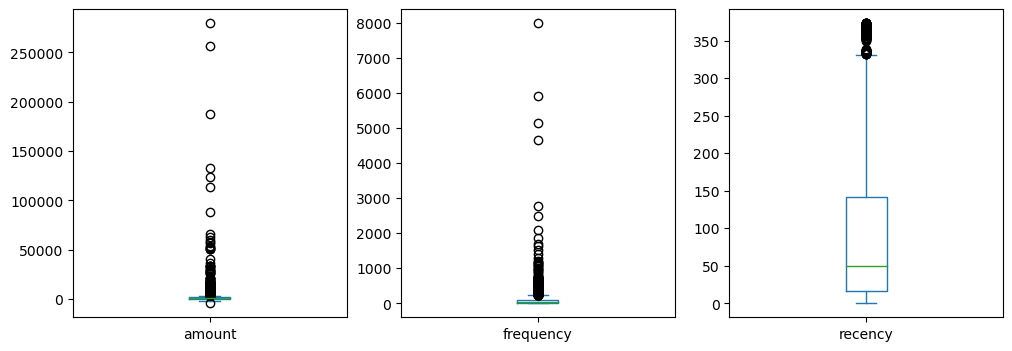

In [31]:
grouped_df[["amount","frequency","recency"]].plot.box(subplots=True,figsize=(12,4))
plt.show()

In [33]:
# removing statistical outliers (condering above 95% percentile and below 5% is considered as outlier)

In [34]:
# outlier treatment for a"amount"
Q1 = grouped_df["amount"].quantile(0.05)
Q3 = grouped_df["amount"].quantile(0.95)
IQR = Q3 - Q1
grouped_df = grouped_df[(grouped_df["amount"] >= Q1 - 1.5*IQR) & (grouped_df["amount"] <= Q3 + 1.5*IQR)]

# outlier treatment for recency
Q1 = grouped_df["recency"].quantile(0.05)
Q3 = grouped_df["recency"].quantile(0.95)
IQR = Q3 - Q1
grouped_df = grouped_df[(grouped_df["recency"] >= Q1 - 1.5*IQR) & (grouped_df["recency"] <= Q3 + 1.5*IQR)]

# outlier treatment for frequency
Q1 = grouped_df["frequency"].quantile(0.05)
Q3 = grouped_df["frequency"].quantile(0.95)
IQR = Q3 - Q1
grouped_df = grouped_df[(grouped_df["frequency"] >= Q1 - 1.5*IQR) & (grouped_df["frequency"]<= Q3 + 1.5*IQR)]

In [35]:
grouped_df.describe()

,CustomerID,amount,frequency,recency
count,4293.000000,4293.000000,4293.000000,4293.000000
mean,15299.900769,1270.411464,77.483578,92.548567
std,1722.942628,1755.551155,100.270448,101.006845
min,12346.000000,-4287.630000,1.000000,0.000000
25%,13811.000000,289.360000,17.000000,17.000000
50%,15304.000000,632.970000,40.000000,50.000000
75%,16779.000000,1518.430000,97.000000,145.000000
max,18287.000000,13677.590000,718.000000,373.000000


#### Rescaling

In [36]:
grouped_df.head()

,CustomerID,amount,frequency,recency
0,12346,0.00,2,325
1,12347,4310.00,182,1
2,12348,1797.24,31,74
3,12349,1757.55,73,18
4,12350,334.40,17,309


In [37]:
# instantiate
scaler=StandardScaler()

num_vars=["amount","frequency","recency"]

# fit_transform
rfm_df_scaled=scaler.fit_transform(grouped_df[num_vars])

In [38]:
rfm_df_scaled=pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['amount', 'frequency', 'recency']
rfm_df_scaled.head()

,amount,frequency,recency
0,-0.723738,-0.752888,2.301611
1,1.731617,1.042467,-0.906466
2,0.300128,-0.463636,-0.183658
3,0.277517,-0.044720,-0.738141
4,-0.533235,-0.603275,2.143188


# 4. Modelling

Now let's begin the modelling part by creating the clusters using the SKlearn's K-means algorithm package.

In [40]:
# K-Means with some arbitrary k

kmeans=KMeans(n_clusters=4,max_iter=50,random_state=100)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=4, random_state=100)

In [41]:
kmeans.labels_                      

array([2, 0, 1, ..., 2, 1, 1])

### Findind the Optimal Number of Clusters

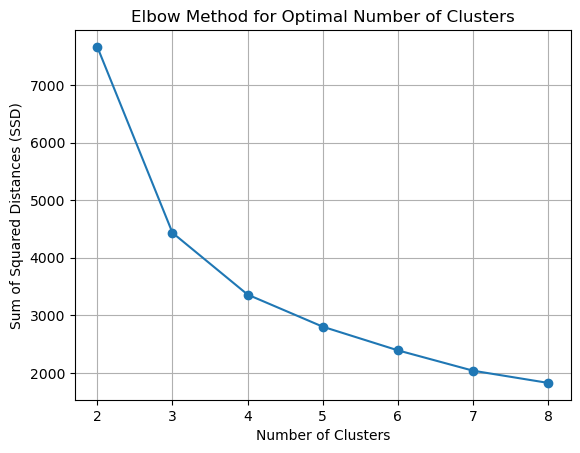

In [43]:
# elbow curve/SSD

ssd=[]
range_n_clusters=[2,3,4,5,6,7,8]   
for i in range_n_clusters:
    kmeans=KMeans(n_clusters=i,max_iter=50,random_state=100)
    kmeans.fit(rfm_df_scaled)
    ssd.append(kmeans.inertia_)
    
#plot the SSDs
plt.plot(range_n_clusters, ssd, marker='o') 
plt.xticks(range_n_clusters)
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances (SSD)')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.grid(True)  # Optional: add grid for better readability
plt.show()

This pattern is known as the elbow curve. Typically, up to the elbow point, the rate of drop in SSD is significant. Beyond this point, the rate of drop becomes less significant

As you increase the number of clusters, the value of the SSD (Sum of Squared Distances of samples to their closest cluster center) naturally decreases. This is because having more clusters generally results in samples being closer to their respective cluster centers.

When we have 2 clusters, the SSD is 9000. Moving from 2 to 3 clusters causes a significant drop in SSD. However, increasing from 3 to 4 clusters results in a smaller reduction in SSD, indicating a less significant improvement. Therefore, it appears that having 3 clusters is a good choice

### Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [44]:
# silhouette analysis

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i, max_iter=50,random_state=100)
    kmeans.fit(rfm_df_scaled)
    cluster_labels=kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels )
    print(f"For n_clusters={i}, the silhouette score is {silhouette_avg}")
    

For n_clusters=2, the silhouette score is 0.5415858652525395
For n_clusters=3, the silhouette score is 0.5084896296141937
For n_clusters=4, the silhouette score is 0.4819322183737683
For n_clusters=5, the silhouette score is 0.46627005641897035
For n_clusters=6, the silhouette score is 0.41766147997150216
For n_clusters=7, the silhouette score is 0.4174455951142335
For n_clusters=8, the silhouette score is 0.40728763609819607



While mathematically, 2 clusters might be optimal based on the results, it may not be the most interpretable from a business perspective. If 3 clusters make more sense for business decisions, then the optimal number of clusters depends on the specific problem you are solving, not just on mathematical criteria.

We'll proceed withn_clusters=3 as it appears to be the optimal choice. Both the elbow curve and our business interpretation support this decision.

In [45]:
# final model with k=3

kmeans_1=KMeans(n_clusters=3,max_iter=50,random_state=100)
kmeans_1.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=3, random_state=100)

In [46]:
kmeans_1.labels_

array([1, 2, 0, ..., 1, 0, 0])

In [47]:
grouped_df

,CustomerID,amount,frequency,recency
0,12346,0.00,2,325
1,12347,4310.00,182,1
2,12348,1797.24,31,74
3,12349,1757.55,73,18
4,12350,334.40,17,309
...,...,...,...,...
4366,18278,173.90,9,73
4367,18280,180.60,10,277
4368,18281,80.82,7,180
4369,18282,176.60,13,7


In [48]:
# assigning the labels

grouped_df["cluster_id"]=kmeans_1.labels_
grouped_df.head()

,CustomerID,amount,frequency,recency,cluster_id
0,12346,0.00,2,325,1
1,12347,4310.00,182,1,2
2,12348,1797.24,31,74,0
3,12349,1757.55,73,18,0
4,12350,334.40,17,309,1


In [49]:
grouped_df.head()

,CustomerID,amount,frequency,recency,cluster_id
0,12346,0.00,2,325,1
1,12347,4310.00,182,1,2
2,12348,1797.24,31,74,0
3,12349,1757.55,73,18,0
4,12350,334.40,17,309,1


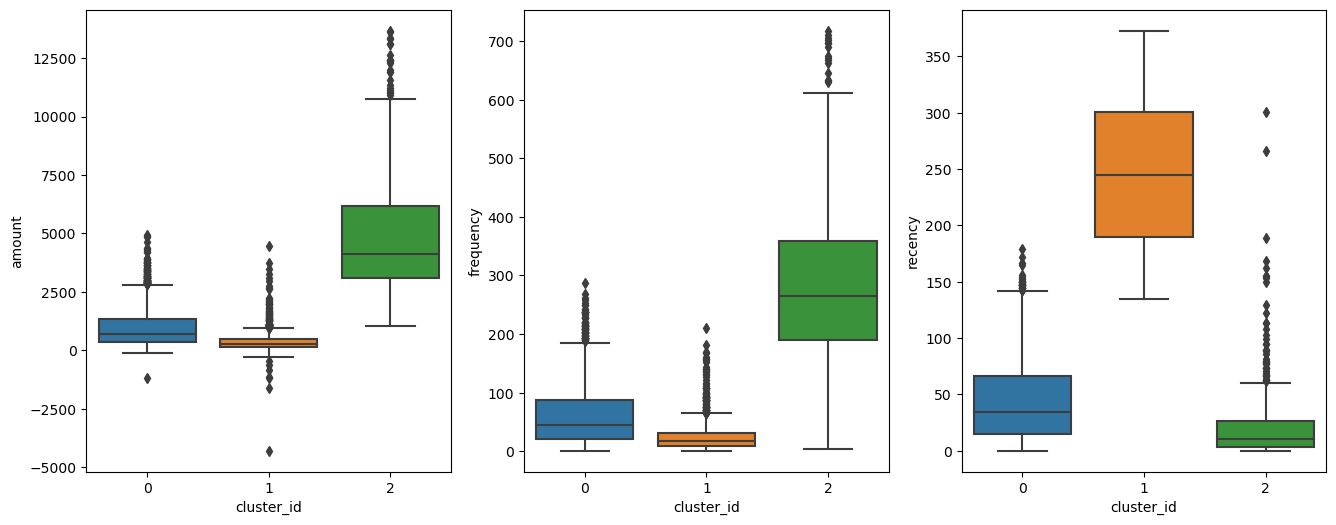

In [50]:
# plot

plt.figure(figsize=(16,6))
plt.subplot(1,3,1)
sns.boxplot(x="cluster_id",y="amount",data=grouped_df)
plt.subplot(1,3,2)
sns.boxplot(x="cluster_id",y="frequency",data=grouped_df)
plt.subplot(1,3,3)
sns.boxplot(x="cluster_id",y="recency",data=grouped_df)
plt.show()

# Hierarchical Clustering

In [51]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

              #or
    
#from scipy.cluster.hierarchy import linkage,dendrogram,cut_tree

In [52]:
rfm_df_scaled.head()

,amount,frequency,recency
0,-0.723738,-0.752888,2.301611
1,1.731617,1.042467,-0.906466
2,0.300128,-0.463636,-0.183658
3,0.277517,-0.044720,-0.738141
4,-0.533235,-0.603275,2.143188


In [53]:
grouped_df.head()

,CustomerID,amount,frequency,recency,cluster_id
0,12346,0.00,2,325,1
1,12347,4310.00,182,1,2
2,12348,1797.24,31,74,0
3,12349,1757.55,73,18,0
4,12350,334.40,17,309,1


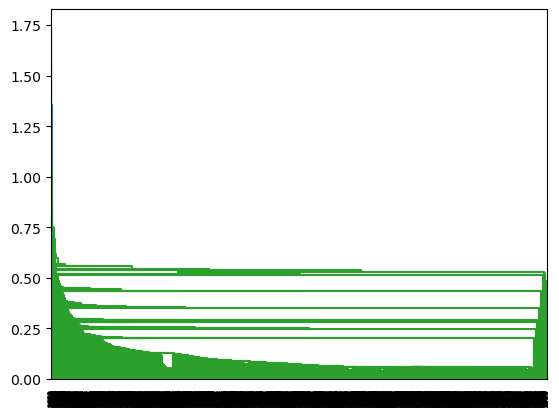

In [54]:
# single linkage

mergings = linkage(rfm_df_scaled, method='single', metric='euclidean')    #  metric='euclidean' is by default
dendrogram(mergings)
plt.show()

As we can clearly see, single linkage doesn't produce a good enough result for us to analyse the clusters. Hence, we need to go ahead and utilise the complete linkage method and then analyse the clusters once again.

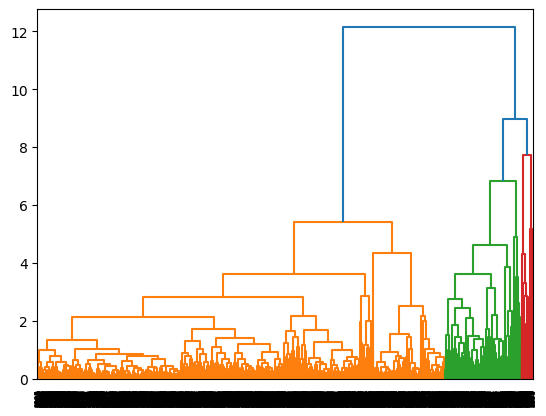

In [55]:
# complete linkage

mergings = linkage(rfm_df_scaled, method="complete")   
dendrogram(mergings)
plt.show()

In [56]:
# 3 clusters

cut_tree(mergings,n_clusters=3)

array([[0],
       [1],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [57]:
cut_tree(mergings,n_clusters=3).shape

(4293, 1)

In [59]:
cut_tree(mergings,n_clusters=3).reshape(-1)                    

array([0, 1, 0, ..., 0, 0, 0])

In [61]:
cluster_labels=cut_tree(mergings,n_clusters=3).reshape(-1)

In [62]:
# assign cluser labels

grouped_df["cluser_labels"]=cluster_labels

In [63]:
grouped_df.head()

,CustomerID,amount,frequency,recency,cluster_id,cluser_labels
0,12346,0.00,2,325,1,0
1,12347,4310.00,182,1,2,1
2,12348,1797.24,31,74,0,0
3,12349,1757.55,73,18,0,0
4,12350,334.40,17,309,1,0


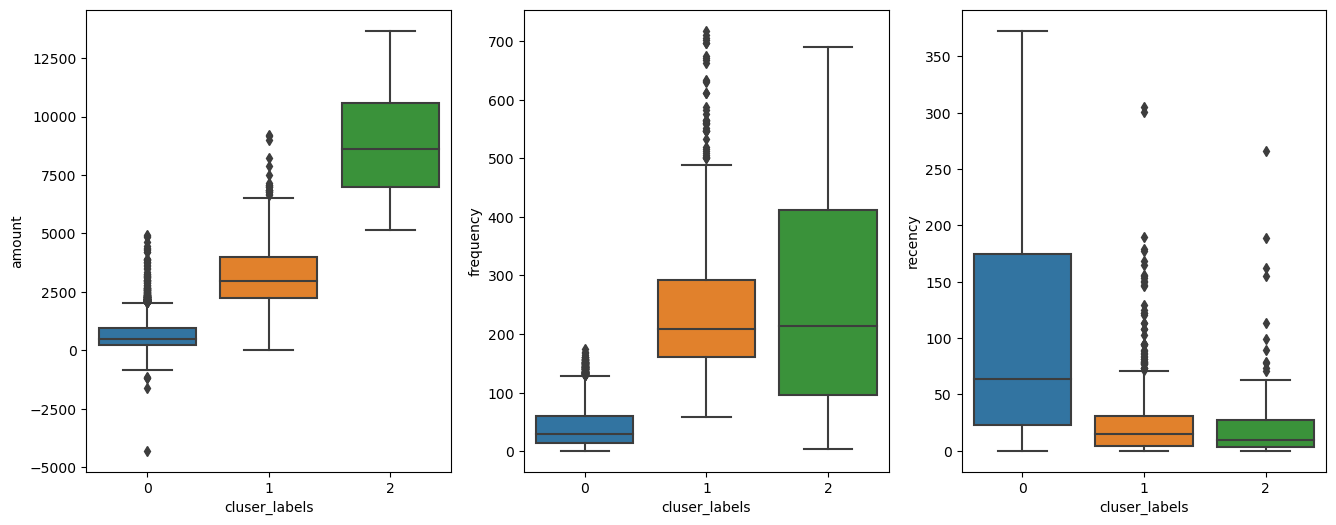

In [64]:
# plot

plt.figure(figsize=(16,6))
plt.subplot(1,3,1)
sns.boxplot(x="cluser_labels",y="amount",data=grouped_df)
plt.subplot(1,3,2)
sns.boxplot(x="cluser_labels",y="frequency",data=grouped_df)
plt.subplot(1,3,3)
sns.boxplot(x="cluser_labels",y="recency",data=grouped_df)
plt.show()